In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data=pd.read_csv('home_price_Banglore.csv',sep='\t')
data

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


#### Data Preprocessing

In [24]:
data.columns

Index(['area', 'bedrooms', 'price'], dtype='object')

In [25]:
data.isnull().sum()

area        0
bedrooms    0
price       0
dtype: int64

Dataset has no missing values ..

3 columns of objects

predict price 

select area and bedroom for predicting price

In [26]:
x=data.drop('price',axis=1)
print(x.shape)
x

(20, 2)


,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


variance between area data are high..so prediction cant be correct

to solve use standard scaler /min_max scaler

In [27]:
y=data['price']
y.shape

(20,)

##### Scaling

In [28]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler() 
scaled_y=sy.fit_transform(data['price'].values.reshape(data.shape[0],1)) ## transform  y data 1d to 2d..reshape
scaled_x=sx.fit_transform(data.drop('price',axis=1))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [29]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [30]:
### y=m1.x1+m2.x2+c
## let take m = w 
w=np.ones(shape=scaled_x.shape[1])
w  ## m1 m2 ...[1,1]

array([1., 1.])

In [31]:
w.shape ## 2 is area and bedroom column
## in matrrics we only can multiply 2x2 . 2x2 matrics 
## so we need to transpose 

(2,)

In [32]:
np.dot(w,scaled_x.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [33]:
np.dot(w,scaled_x.T).shape

(20,)

In [34]:
(scaled_x.T).shape

(2, 20)

###### Batch gradient descent

find slope,intp,cost

In [35]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    
    ##below cost epoch for ploting 
    cost_list=[]
    epoch_list=[]
    
    
    for i in range(epochs):
        y_predicted=np.dot(w,X.T)+b ## w1.area+w2.bedroom +b
        
        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted)) ## derivative rss wr to slope
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)   ## derivative rss wr to intp
        
        ## find new parameter 
        w=w-learning_rate*w_grad  #newslope
        b=b-learning_rate*b_grad  #new intp
    
    
        cost=np.mean(np.square(y_true-y_predicted))
        
        
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
      
    return w,b,cost,cost_list,epoch_list
      
    
w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

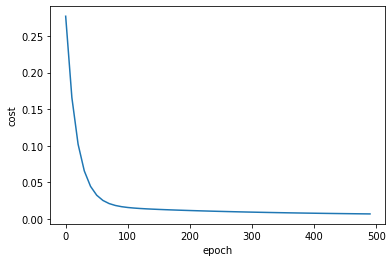

In [36]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

prediction

In [37]:
scaled_x=sx.transform([[2600,4]])[0]  ## we need to predict 2600 area,4 bedroom
scaled_x[0]

## w is slope ....b is intp/bias

0.6206896551724137

In [38]:
def predict(area,bedroom,w,b):
    scaled_x=sx.transform([[area,bedroom]])[0]
    
    scaled_price=w[0]*scaled_x[0]+ w[1]*scaled_x[1]+b  ## w1x1 + w2x2+b
    
    return sy.inverse_transform(([[scaled_price]]))[0][0]

predict(2600,4,w,b)
    

128.45484403267596

In [39]:
predict(4000,3,w,b)

151.77328611058198

#### Stochastic Gradient descent

In [40]:

#random.randint(0,6)  
## SGD selct data randomly ...so its faster than batch GD

In [58]:

import random

def SGD(X, y_true, epochs, learning_rate=0.01):
    
    number_of_features=X.shape[1]
    
    #numpy aray with 1 row and colun equal to numb of features
    #in our case number_of_feature=3(area,bedroom and age)
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    
    ##below cost epoch for ploting 
    cost_list=[]
    epoch_list=[]
    
    
    for i in range(epochs):
        
        
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        
        
        y_predicted=np.dot(w, sample_x.T)+b ## w1.area+w2.bedroom +b
        
        w_grad=-(2/total_samples)*( sample_x.T.dot(sample_y-y_predicted)) ## derivative rss wr to slope
        b_grad=-(2/total_samples)*np.sum(sample_y-y_predicted)   ## derivative rss wr to intp
        
        ## find new parameter 
        w=w-learning_rate*w_grad  #newslope
        b=b-learning_rate*b_grad  #new intp
    
    
        cost=np.mean(np.square(sample_y-y_predicted))
        
        
         
        if i%100==0:  ## at every 100th iteration record the cost and epoch values
            cost_list.append(cost)
            epoch_list.append(i)
      
    return w,b,cost,cost_list,epoch_list
      
    
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd=SGD(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
#w_sgd,b_sgd,cost_sgd 

IndexError: tuple index out of range

In [47]:
def predict(area,bedroom,w,b):
    scaled_x=sx.transform([[area,bedroom]])[0]
    
    scaled_price=w[0]*scaled_x[0]+ w[1]*scaled_x[1]+b  ## w1x1 + w2x2+b
    
    return sy.inverse_transform(([[scaled_price]]))[0][0]

predict(2600,4,w,b)


128.45484403267596

#### Mini Batch Gradient Descent